In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
#Importing the mnist keras dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#getting the training and testing images and labels
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

Importing matplotlib and Numpy in order to visualize the data

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set(font_scale = 2)

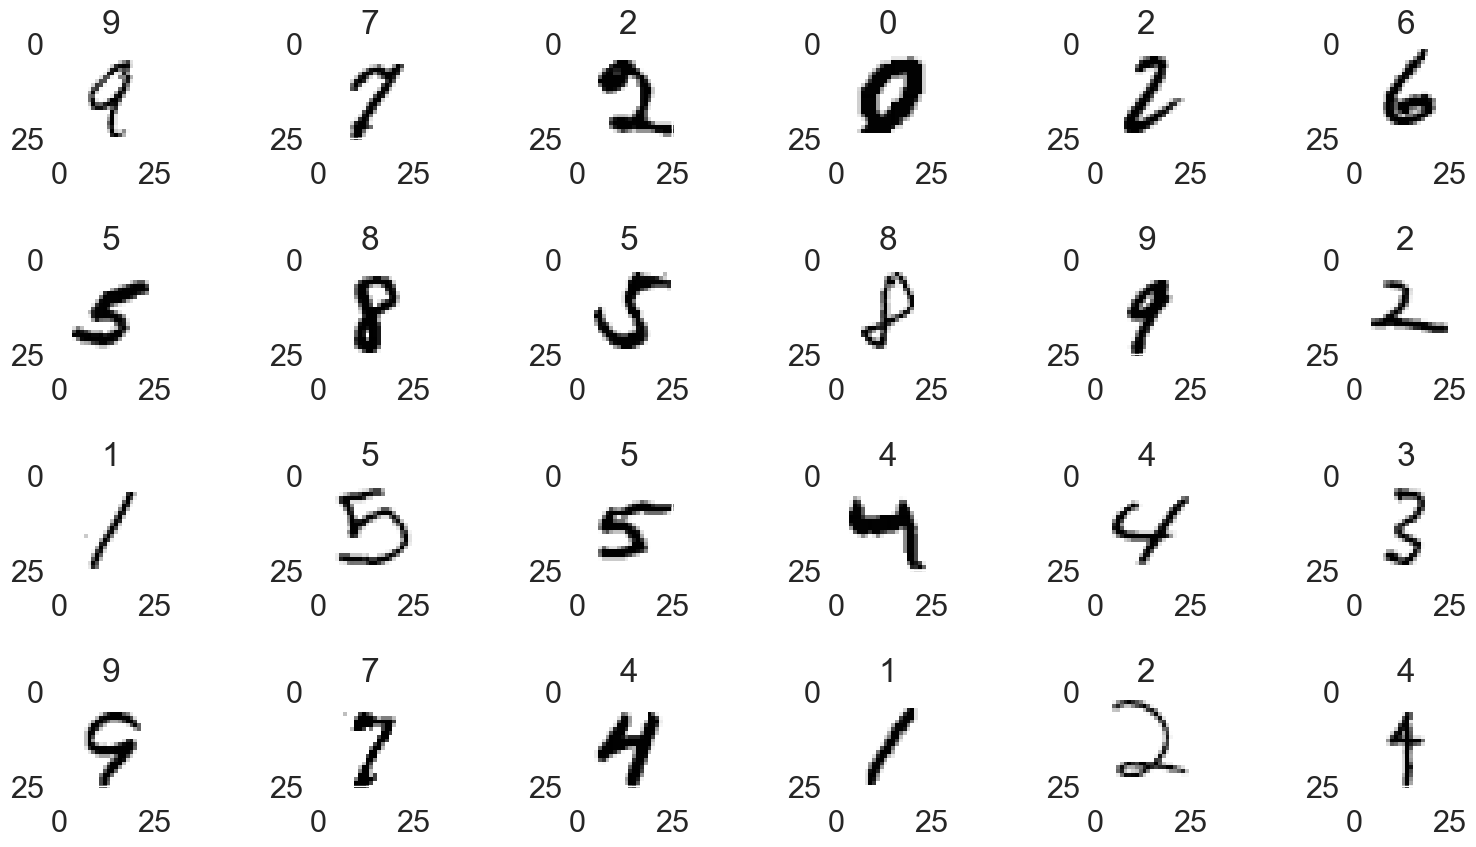

In [10]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace = False)
figure, axes = plt.subplots(nrows = 4, ncols = 6, figsize = (16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap = plt.cm.gray_r)
    axes.set_xticks = ([]) #removes the tick marks on the x axis
    axes.set_yticks = ([]) #removes the tick marks on the y axis
    axes.set_title(target)
plt.tight_layout()

# Data preparation

Keras requires a numpy input array in order to covnet with each sample.

Numpy Sample input:

(Width, Height, Channel)

Keras Mnist input:

(28, 28, 1)

In [11]:
X_train =  X_train.reshape((60000, 28, 28, 1))

In [12]:
X_train.shape

(60000, 28, 28, 1)

In [13]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [14]:
X_test.shape

(10000, 28, 28, 1)

In [15]:
X_train = X_train.astype('float32') / 255

In [16]:
X_test = X_test.astype('float32') / 255

Changing the one-hot encoding labels from integers to categorical data

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train = to_categorical(y_train)

In [19]:
y_train.shape

(60000, 10)

In [20]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [21]:
y_test = to_categorical(y_test)

In [22]:
y_test.shape

(10000, 10)

the to_categorical statements turn the values 0-9 of each element into array of 1.0 and 0.0 in which only one value is a 1.0 while the rest are 0.0

# Importing the module that lets us add layer to the CNN

In [23]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential

In [24]:
cnn = Sequential()

Adding a convolution layer

In [25]:
cnn.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu',
              input_shape = (28, 28, 1)))

In [27]:
cnn.add(MaxPooling2D(pool_size = (2, 2)))

In [28]:
cnn.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))

In [29]:
cnn.add(MaxPooling2D(pool_size = (2, 2)))

In [30]:
cnn.add(Flatten())

In [31]:
cnn.add(Dense(units = 128, activation = 'relu'))

In [32]:
cnn.add(Dense(units = 10, activation = 'softmax'))

# Printing the model summary

In [33]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

# Visualizing the models structure

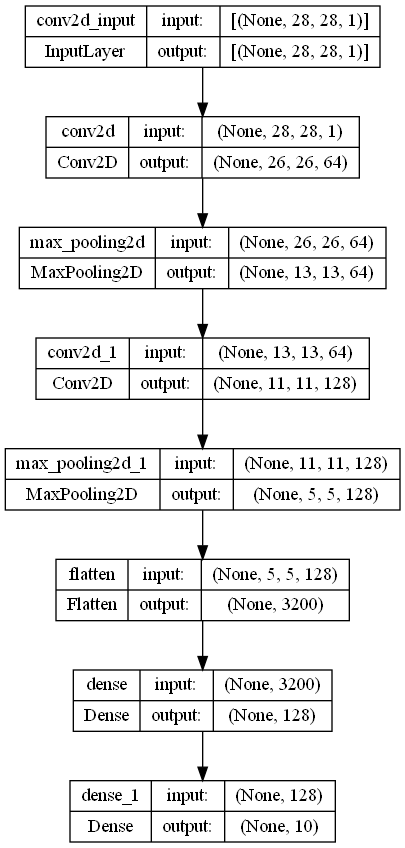

In [34]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file = 'covnet.png', show_shapes = True, show_layer_names = True)
Image(filename = 'covnet.png')

# Compiling the model

In [35]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training and Evaluating the model

In [36]:
cnn.fit(X_train, y_train, epochs = 5, batch_size = 64,
       validation_split = 0.1)

Epoch 1/5
844/844 [==============================] - 55s 64ms/step - loss: 0.1382 - accuracy: 0.9577 - val_loss: 0.0433 - val_accuracy: 0.9870
Epoch 2/5
844/844 [==============================] - 54s 64ms/step - loss: 0.0419 - accuracy: 0.9871 - val_loss: 0.0399 - val_accuracy: 0.9885
Epoch 3/5
844/844 [==============================] - 55s 65ms/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.0336 - val_accuracy: 0.9893
Epoch 4/5
844/844 [==============================] - 54s 65ms/step - loss: 0.0201 - accuracy: 0.9938 - val_loss: 0.0348 - val_accuracy: 0.9910
Epoch 5/5
844/844 [==============================] - 55s 65ms/step - loss: 0.0146 - accuracy: 0.9951 - val_loss: 0.0494 - val_accuracy: 0.9872


# Evaluating

In [37]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 12s 39ms/step - loss: 0.0405 - accuracy: 0.9886


In [38]:
loss

0.040521711111068726

In [39]:
accuracy

0.9886000156402588

# Making Predictions

In [41]:
predictions = cnn.predict(X_test)

313/313 [==============================] - 11s 35ms/step


In [42]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [43]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability: .10%}')

0:  0.0000000087%
1:  0.0000019519%
2:  0.0000358342%
3:  0.0000194471%
4:  0.0000000006%
5:  0.0000000182%
6:  0.0000000000%
7:  99.9999105930%
8:  0.0000005120%
9:  0.0000255250%


# Locating the incorrect predictions

In [44]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

In [47]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [48]:
len(incorrect_predictions)

114

# Visualizing incorrect predictions

ValueError: not enough values to unpack (expected 4, got 3)

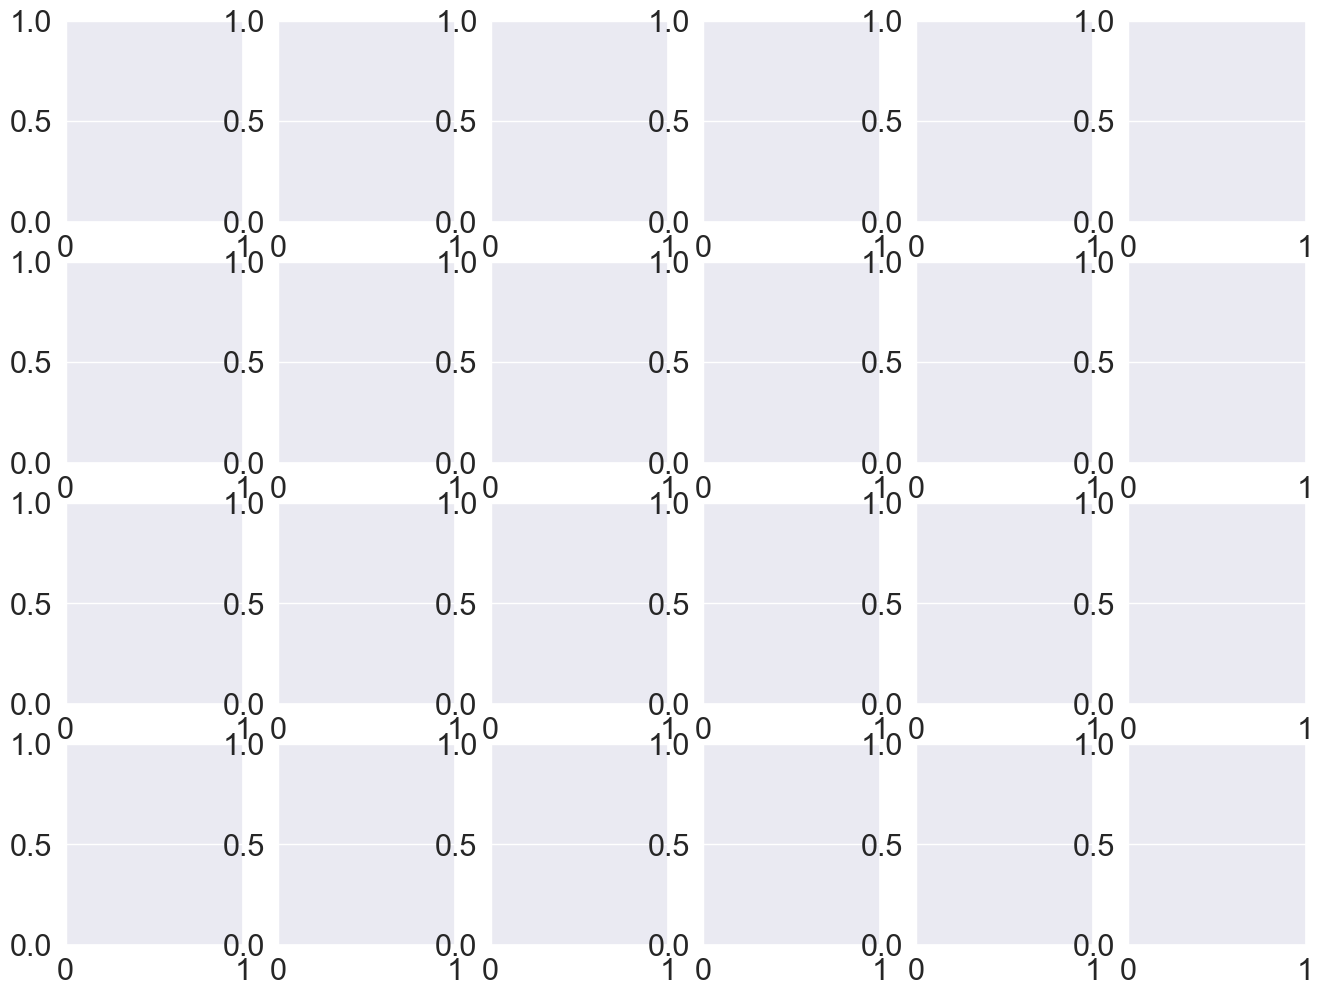

In [50]:
figures, axes = plt.subplots(nrows = 4, ncols = 6, figsize = (16,12))

for axes in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) #remove x axis labels
    axes.set_yticks([]) #remove y axis labels
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [51]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [52]:
display_probabilities(predictions[495])

0: 0.2465393161%
1: 0.0000028893%
2: 45.3457415104%
3: 0.0354044896%
4: 0.0001992587%
5: 0.0006072347%
6: 0.0197139118%
7: 0.0000003502%
8: 54.3475449085%
9: 0.0042388194%


In [53]:
display_probabilities(predictions[583])

0: 0.0000000083%
1: 0.0000171220%
2: 98.0603635311%
3: 0.0772909261%
4: 0.0000000284%
5: 0.0000000004%
6: 0.0000000000%
7: 1.8249271438%
8: 0.0373912801%
9: 0.0000015039%


In [54]:
display_probabilities(predictions[625])

0: 0.0002157053%
1: 0.0000389978%
2: 0.0008890273%
3: 0.0000000066%
4: 99.5320200920%
5: 0.0000000590%
6: 0.4657272249%
7: 0.0000000301%
8: 0.0000015758%
9: 0.0011163168%


In [55]:
cnn.save('mnist_cnn.h5')